In [1]:

'''
We install the necessary packages required for this Task
'''

!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0 box2d box2d-kengz
!apt-get update &&  apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!python -m pip install --upgrade pip
!pip install -U setuptools
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym[atari_py]
!apt install ffmpeg
!which ffmpeg
!pip install stable_baselines

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security

In [0]:

'''
This block contains all the necessary imports required for this task
'''
import gym
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import random, math, time
import numpy as np
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DQN
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.ddpg.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.build_graph import build_act, build_train
from matplotlib.image import imread
from matplotlib import rc, animation
from IPython import display
from pyvirtualdisplay import Display
from IPython.display import HTML
from pyvirtualdisplay import Display
from stable_baselines.deepq.build_graph import build_act, build_train
%matplotlib inline

try:
  from google.colab import files
except:
  print("Could not import Google Colab.")




In [0]:
display = Display(visible=0, size=(400, 300))
display.start()
best_mean_reward, n_steps = -np.inf, 0
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'

In [0]:
def callback(_locals, _globals):
    """
    Callback called at each step for our DQN algorithm
    """
    global n_steps, best_mean_reward
    # Print stats for every 1000 calls made
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))
            # Saves the best mean reward obtained so far
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
    n_steps += 1
    return False

In [5]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

'''
The Environment chosen is CartPole-v0. 
The task is to balance the pole for as much time as possible by moving left,right or staying at the same place. 
By interacting with the environment it learns which direction to move when the pole starts to slant. 
We use the DQN algorithm which one of the many popular Algorithms to train the agent.
'''
env = gym.make('CartPole-v0')
# Monitor as the name suggests monitors training and logs all in the information in log_dir/monitor.csv
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [6]:
# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.2, desired_action_stddev=0.2)
'''
Defines the DQN algorithm which we will be using 
'''
model = DQN(MlpPolicy, env, param_noise=param_noise,  verbose=0)
'''
model.learn returns a trained model in order for us to predict later
total_timesteps->The total number of samples to train on
'''
model.learn(total_timesteps=50000, callback=callback)

999 timesteps
Best mean reward: -inf - Last mean reward per episode: 13.88
Saving new best model
1999 timesteps
Best mean reward: 13.88 - Last mean reward per episode: 14.80
Saving new best model
2980 timesteps
Best mean reward: 14.80 - Last mean reward per episode: 18.43
Saving new best model
3957 timesteps
Best mean reward: 18.43 - Last mean reward per episode: 24.69
Saving new best model
4982 timesteps
Best mean reward: 24.69 - Last mean reward per episode: 32.23
Saving new best model
5868 timesteps
Best mean reward: 32.23 - Last mean reward per episode: 39.79
Saving new best model
6949 timesteps
Best mean reward: 39.79 - Last mean reward per episode: 48.80
Saving new best model
7966 timesteps
Best mean reward: 48.80 - Last mean reward per episode: 57.52
Saving new best model
8817 timesteps
Best mean reward: 57.52 - Last mean reward per episode: 64.74
Saving new best model
9840 timesteps
Best mean reward: 64.74 - Last mean reward per episode: 73.94
Saving new best model
10902 timest

## Plotting helpers

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plots the results in using matplotlib
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


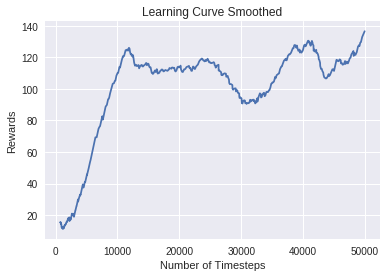

In [8]:
plot_results(log_dir)

In [0]:
reward = []
'''
This is used to store all the frames which we will be using to save our animation file
'''
frames=[]
'''
Before we proceed we reset the environment to bring it to initial state
'''
obs = env.reset() # get the observation of the environment 

for i in range(1000):
    '''
    model.predict-> It gets the model’s action from an observation
    '''
    action, _states = model.predict(obs)
    '''
    Step function makes a step from the current state to next.
    The step function returns 4 values namely observation,reward,done and info
    
    observation -> Represents agent's observation of the environment
    reward -> amount of reward achieved by the previous action
    done -> If the game is over
    info -> some kind of information which can be used for debugging
    '''  
    obs, rewards, dones, info = env.step(action) 
    #render the environment 
    screen = env.render(mode='rgb_array')
    #This appending lets us create an animation later 
    frames.append(screen)
    reward.append(rewards)

In [10]:
rewards

array([1.], dtype=float32)

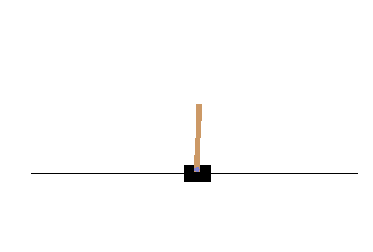

In [11]:
#Combine all frames into an animation 
fig, ax = plt.subplots()
plt.axis('off')
l = ax.imshow(frames[0])

def animate(i):
    l.set_data(frames[i])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12, metadata=dict(artist='Me'))
ani = animation.FuncAnimation(fig, animate, frames=len(frames))

ani.save('bonus1.mp4', writer=writer, dpi=220)
time.sleep(5) # let it process (only necessary in Colab)



In [0]:
files.download('bonus1.mp4')